# 零基础入门金融风控——贷款为违约预测挑战赛

## 一、赛题的理解

赛题以金融风控中的个人信贷为背景,要求选手根据贷款申请人的数据信息预测其是否有违约的可能,以此判断是否通过此项贷款,这是一个典型的分类问题。通过这道赛题来引导大家了解金融风控中的一些业务背景,解决实际问题,帮助竞赛新人进行自我练习、自我提高。

## 1.1 赛题情况

**比赛要求参赛选手根据给定的数据集,建立模型,预测金融风险。**

赛题以预测金融风险为任务,数据集报名后可见并可下载,该数据来自某信贷平台的贷款记录,总数据量超过120w,包含47列变量信息,其中15列为匿名变量。为了保证比赛的公平性,将会从中抽取80万条作为训练集,20万条作为测试集A,20万条作为测试集B,同时会对employmentTitle、purpose、postCode和title等信息进行脱敏。通过这道赛题来引导大家走进金融风控数据竞赛的世界,主要针对于于竞赛新人进行自我练习、自我提高。

### 1.2 数据情况

train.csv
- 1. id 为贷款清单分配的唯一信用证标识
- 2. loanAmnt 贷款金额
- 3. term 贷款期限(year)
- 4. interestRate 贷款利率
- 5. installment 分期付款金额
- 6. grade 贷款等级
- 7. subGrade 贷款等级之子级
- 8. employmentTitle 就业职称
- 9. employmentLength 就业年限(年)
- 10. homeOwnership 借款人在登记时提供的房屋所有权状况
- 11. annualIncome 年收入
- 12. verificationStatus 验证状态
- 13. issueDate 贷款发放的月份
- 14. purpose 借款人在贷款申请时的贷款用途类别
- 15. postCode 借款人在贷款申请中提供的邮政编码的前3位数字
- 16. regionCode 地区编码
- 17. dti 债务收入比
- 18. delinquency_2years
- 19. ficoRangeLow 借款人过去2年信用档案中逾期30天以上的违约事件数
- 20. ficoRangeHigh 借款人在贷款发放时的fico所属的上限范围
- 21. openAcc 借款人信用档案中未结信用额度的数量
- 22. pubRec 贬损公共记录的数量
- 23. pubRecBankruptcies 公开记录清除的数量
- 24. revolBal 信贷周转余额合计25. revolUtil 循环额度利用率,或借款人使用的相对于所有可用循环信贷的信贷金额
- 26. totalAcc 借款人信用档案中当前的信用额度总数
- 27. initialListStatus 贷款的初始列表状态
- 28. applicationType 表明贷款是个人申请还是与两个共同借款人的联合申请
- 29. earliesCreditLine  借款人最早报告的信用额度开立的月份
- 30. title 借款人提供的贷款名称
- 31. policyCode 公开可用的策略 代码 =1   新产品不公开可用的策略 代码=2
- 32. n系列匿名特征 匿名特征n0-n14,为一些贷款人行为计数特征的处理

### 1.3 预测指标

竞赛采用AUC作为评价指标。AUC(Area Under Curve)被定义为 ROC曲线 下与坐标轴围成的面积。

#### 1.3.1 分类算法常见的评估指标

1、混淆矩阵(Confuse Matrix)

    (1)若一个实例是正类,并且被预测为正类,即为真正类TP(True Positive )
    (2)若一个实例是正类,但是被预测为负类,即为假负类FN(False Negative )
    (3)若一个实例是负类,但是被预测为正类,即为假正类FP(False Positive )
    (4)若一个实例是负类,并且被预测为负类,即为真负类TN(True Negative )

2、准确率(Accuracy)  准确率是常用的一个评价指标,但是不适合样本不均衡的情况。
$Accuracy = \frac{TP + TN}{TP + TN + FN + FP}$

3、精确率(Precision) 又称查准率,正确预测为正样本(TP)占预测为正样本(TP+FP)的百分比。
$Precision = \frac{TP}{TP + FP}$

4、召回率(Recall)    又称为查全率,正确预测为正样本(TP)占正样本(TP+FN)的百分比。
$Recall = \frac{TP}{TP + FN}$

5、F1 Score  精确率和召回率是相互影响的,精确率升高则召回率下降,召回率升高则精确率下降,如果需要兼顾二者,就需要精确率、召回率的结合F1 Score。
$F1 - Score = \frac{2}{\frac{1}{Precision}  +  \frac{1}{Recall}}$

6、P-R曲线(Precision-Recall Curve) P-R曲线是描述精确率和召回率变化的曲线
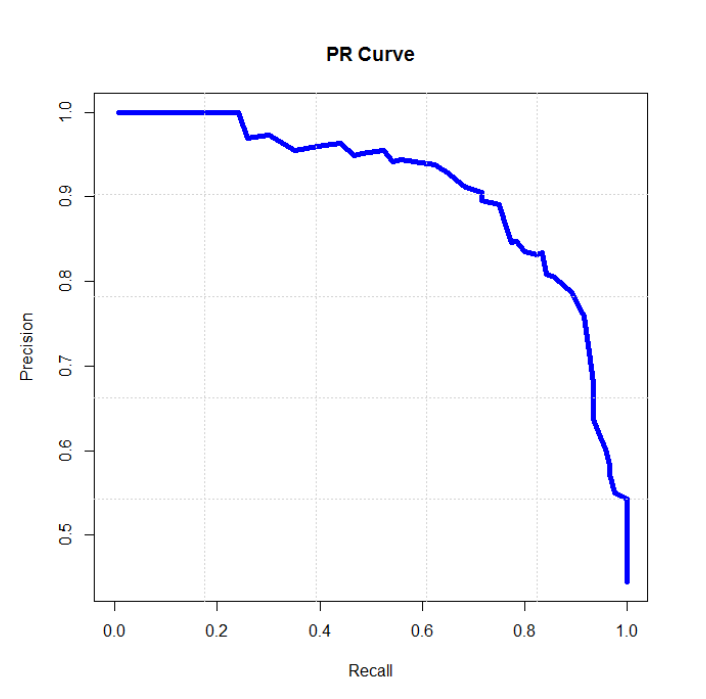

7、ROC(Receiver Operating Characteristic)
 - ROC空间将假正例率(FPR)定义为 X 轴,真正例率(TPR)定义为 Y 轴。
 
TPR:在所有实际为正例的样本中,被正确地判断为正例之比率。
$TPR = \frac{TP}{TP + FN}$

FPR:在所有实际为负例的样本中,被错误地判断为正例之比率。
$FPR = \frac{FP}{FP + TN}$

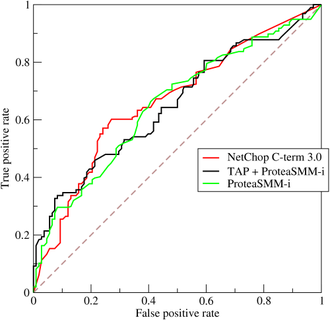

8、AUC(Area Under Curve) AUC(Area Under Curve)被定义为 ROC曲线下与坐标轴围成的面积,显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方,所以AUC的取值范围在0.5和1之间。AUC越接近1.0,检测方法真实性越高;等于0.5时,则真实性最低,无应用价值。

#### 1.3.2 金融风控预测类常见的评估指标

1、KS(Kolmogorov-Smirnov)

K-S曲线与ROC曲线类似,不同在于
1. ROC曲线将真正例率和假正例率作为横纵轴
2. K-S曲线将真正例率和假正例率都作为纵轴,横轴则由选定的阈值来充当。
    公式如下:
    
   $KS = max(TPR - FPR)$
   
   KS不同代表的不同情况,一般情况KS值越大,模型的区分能力越强,但是也不是越大模型效果就越好,如果KS过大,模型可能存在异常,所以当KS值过高可能需要检查模型是否过拟合。以下为KS值对应的模型情况,但此对应不是唯一的,只代表大致趋势。
   
3. KS值<0.2,一般认为模型没有区分能力。
4. KS值[0.2,0.3],模型具有一定区分能力,勉强可以接受
5. KS值[0.3,0.5],模型具有较强的区分能力。
6. KS值大于0.75,往往表示模型有异常。
- ROC
- AUC

### 1.4 赛题流程

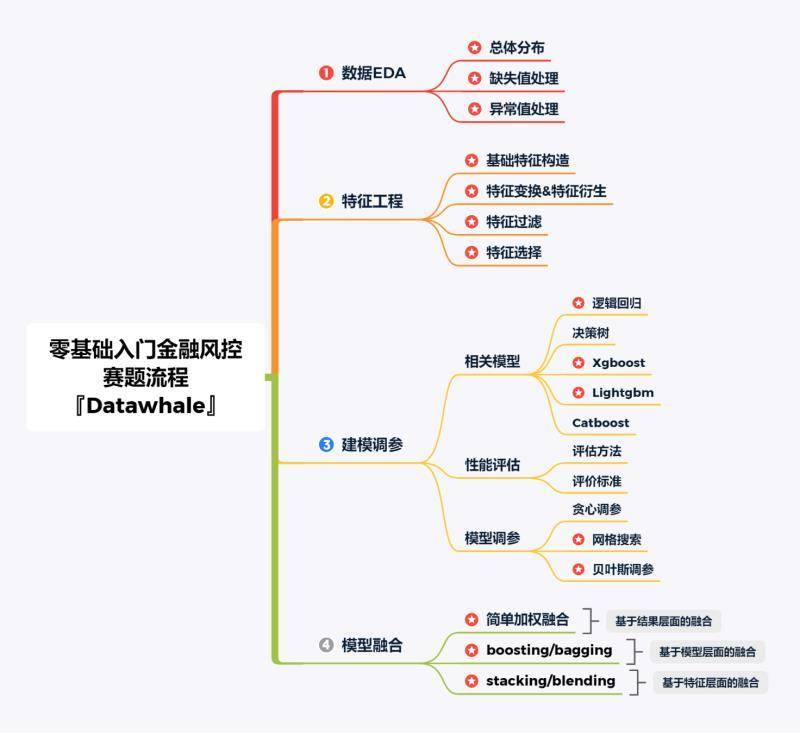

### 1.5 代码示例

#### 1.5.1 数据读取pandas

In [1]:
import pandas as pd
train = pd.read_csv('dataset/train.csv')
testA = pd.read_csv('dataset/testA.csv')

In [2]:
print('Train data shape:', train.shape)
print('TestA data shape:', testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [3]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


#### 1.5.2 分类指标评价计算示例

In [4]:
# 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n', confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [5]:
# accuracy
from sklearn.metrics import accuracy_score

y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:', accuracy_score(y_true, y_pred))

ACC: 0.5


In [6]:
## Precision，Recall,F1-score
from sklearn import metrics

y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision:', metrics.precision_score(y_true, y_pred))
print('Recall:', metrics.recall_score(y_true, y_pred))
print('F1-score:', metrics.f1_score(y_true, y_pred))

Precision: 0.5
Recall: 0.5
F1-score: 0.5


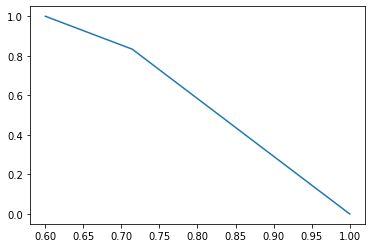

In [7]:
# P-R 曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)


Text(0.5, 0, 'FPR')

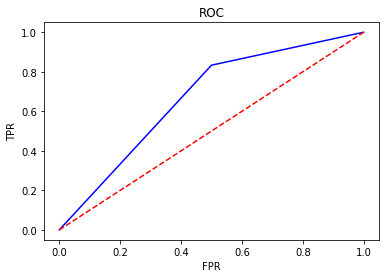

In [8]:
# ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

FPR, TPR, thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR, 'b')
plt.plot([0, 1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [9]:
# AUC
import numpy as np

from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:', roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [10]:
# KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]

FPR, TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：', KS)

KS值： 0.5238095238095237


### 1.6 扩展知识——评分卡

评分卡是一张拥有分数刻度会让相应阈值的表。信用评分卡是用于用户信用的一张刻度表。以下代码是一个非标准评分卡的代码流程,用于刻画用户的信用评分。评分卡是金融风控中常用的一种对于用户信用进行刻画的手段哦!

In [11]:
# 评分卡 不是标准评分卡
def sorce(prob,P0=600,PDO=20,badrate=None,goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score

## 2 数据分析

目的:

    1 EDA价值主要在于熟悉了解整个数据集的基本情况(缺失值,异常值),对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.
    2 了解变量间的相互关系、变量与预测值之间的存在关系。
    3为特征工程做准备

#### 2.1 内容介绍

1. 数据总体了解：
 - 读取数据集并了解数据集大小，原始特征维度
 - 通过info熟悉数据类型
 - 粗略查看数据集中个特征基本统计量
2. 缺失值和唯一值
 - 查看数据缺失值情况
 - 查看唯一值特征情况
3. 深入数据-查看数据类型
 - 类别型数据
 - 数值型数据
       - 离散数值型数据
       - 连续数值型数据
4. 数据间相关关系
 - 特征和特征之间关系
 - 特征和目标变量之间关系
5. 用pandas_proiling生成数据报告


### 2.2 代码示例

##### 2.2.1 导入数据分析及可视化过程需要的库

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

#### 2.2.2 读取文件

In [19]:
data_train = pd.read_csv('dataset/train.csv')
data_test_a = pd.read_csv('dataset/testA.csv')

**读取文件的拓展知识**
1. pandas读取数据时相对路径载入报错时,尝试使用os.getcwd()查看当前工作目录。
2. TSV与CSV的区别:
   
   a. 从名称上即可知道,`TSV是用制表符(Tab,'\t')`作为字段值的分隔符;`CSV是用半角逗号(',')`作为字段
值的分隔符;

   b. Python对TSV文件的支持:
   - Python的csv模块准确的讲应该叫做dsv模块,因为它实际上是支持范式的分隔符分隔值文件(DSV,- delimiter-separated values)的。
   - delimiter参数值默认为半角逗号,即默认将被处理文件视为CSV。当delimiter='\t'时,被处理文件就是TSV。
       
3. 读取文件的部分(适用于文件特别大的场景)

    a. 通过nrows参数,来设置读取文件的前多少行,nrows是一个大于等于0的整数。
    
    b. 分块读取

In [ ]:
#data_train_sample = pd.read_csv("dataset/train.csv", nrows=5)

# 设置chunksize参数，来控制每次迭代数据的大小
# chunker = pd.read_csv("dataset/train.csv", chunksize=5)
#for item in chunker:
 #   print(type(item))
    # <class 'pandas.core.frame.DataFrame'>
    
  #  print(len(item))
    #5


#### 2.2.3 了解总体

**查看数据集的样本个数和与原始特征维度**

In [21]:
data_test_a.shape

(200000, 48)

In [22]:
data_train.shape

(800000, 47)

In [23]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [26]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [27]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


#### 2.2.4 查看数据集中缺失特征值，唯一值等

In [29]:
# 查看缺失值
print(f'There are {data_train.isnull().any().sum()} columns in train dateset with missing values.')

There are 22 columns in train dateset with missing values.


上面得到训练集有22列特征值有缺失值，进一步查看缺失特征中缺失率大于50%的特征

In [32]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()

fea_null_moreThanHalf = {}

for key, value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

In [34]:
fea_null_moreThanHalf

{}

具体的查看缺失特征及缺失率

<AxesSubplot:>

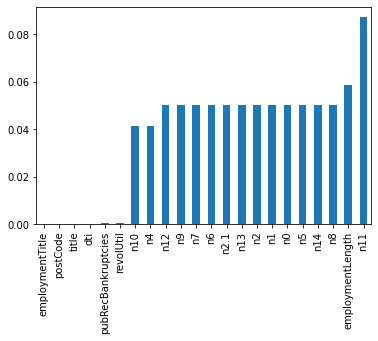

In [36]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()